<a href="https://colab.research.google.com/github/thedatadj/FruitClassifier/blob/using-Logistic-Regression/FruitClassifierLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistice Regression Classifier

In this project I use a Logistic Regression model to classify fruits in a dataset.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Loading the dataset.

fruit_data = pd.read_table("/content/drive/MyDrive/Colab Notebooks/Workspace/Fruit Classifier using KNN/fruit_data_with_colors.txt")


fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
# Splitting the dataset into X and y.
# I utilize only two input features

X = fruit_data[["height", "width"]]
y = fruit_data["fruit_label"]


# I set "orange" as the positive class while
# considering all other classes as negative.

y = y == 3
y.name = "orange"

In [ ]:
# Splitting X and y Datasets into Training and Testing Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Data distribution
shapes = {"X": [X.shape, X_train.shape, X_test.shape],
          "y": [y.shape, y_train.shape, y_test.shape],
          "Percent": ["100%", "75%", "25%"]}

pd.DataFrame(shapes, index=["Data", "Train", "Test"])

,X,y,Percent
Data,"(59, 2)","(59,)",100%
Train,"(44, 2)","(44,)",75%
Test,"(15, 2)","(15,)",25%


In [ ]:
# Trained a Logistic Regression.

from sklearn.linear_model import LogisticRegression


model = LogisticRegression(C=100)
model.fit(X_train, y_train)

LogisticRegression(C=100)

In [ ]:
# Evaluate Model Performance on Training and Test Sets

X_train_score = model.score(X_train, y_train)
X_test_score = model.score(X_test, y_test)

print("Training set score: {:.2f}".format(X_train_score),
      "\nTest set score: {:.2f}".format(X_test_score))

Training set score: 0.77 
Test set score: 0.53


This is not a very good performance, my model is underfitting. 😞

<Axes: xlabel='height', ylabel='width'>

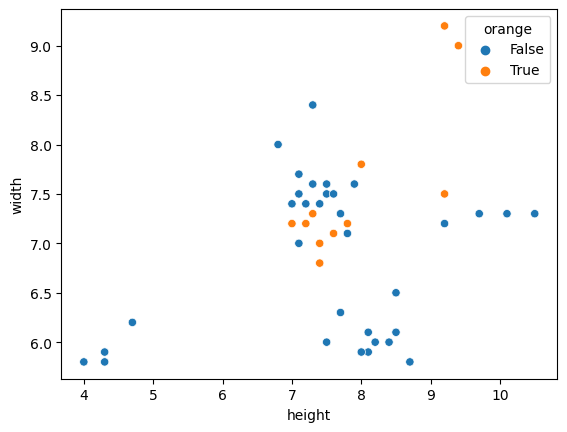

In [ ]:
# Let me investigate the dataset to see why.

sns.scatterplot(x = X_train.height, y = X_train.width, hue=y_train)

Here I can see that the positive data in not linearly separable, so maybe a different model would give better results.